In [33]:
import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.datasets import make_regression, make_swiss_roll

In [12]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [13]:
train_df

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,354912,354912,19975.0,0.2565,801.09,RENT,28000.0,Not Verified,high_risk,n,...,100.0,16.7,0.0,0.0,50055.0,28192.0,18700.0,19055.0,N,N
12176,354944,354944,15000.0,0.1774,540.34,RENT,50000.0,Verified,high_risk,n,...,90.5,11.1,0.0,0.0,70324.0,57025.0,13300.0,54824.0,N,N
12177,354973,354973,3600.0,0.1862,131.28,RENT,60000.0,Not Verified,high_risk,n,...,100.0,0.0,0.0,0.0,83765.0,55156.0,14800.0,53065.0,N,N
12178,355002,355002,15000.0,0.0881,475.68,MORTGAGE,62000.0,Source Verified,high_risk,n,...,100.0,0.0,0.0,0.0,189930.0,23748.0,7000.0,32930.0,N,N


In [38]:
print(pd.get_dummies(train_df))

       Unnamed: 0   index  loan_amnt  int_rate  installment  annual_inc  \
0           57107   57107    13375.0    0.1797       483.34    223000.0   
1          141451  141451    21000.0    0.1308       478.68    123000.0   
2          321143  321143    20000.0    0.1240       448.95    197000.0   
3           11778   11778     3000.0    0.1240       100.22     45000.0   
4          169382  169382    30000.0    0.1612      1056.49    133000.0   
...           ...     ...        ...       ...          ...         ...   
12175      354912  354912    19975.0    0.2565       801.09     28000.0   
12176      354944  354944    15000.0    0.1774       540.34     50000.0   
12177      354973  354973     3600.0    0.1862       131.28     60000.0   
12178      355002  355002    15000.0    0.0881       475.68     62000.0   
12179      355307  355307    15000.0    0.1774       540.34     54080.0   

         dti  delinq_2yrs  inq_last_6mths  open_acc  ...  \
0      29.99          0.0             0

In [39]:
print(pd.get_dummies(test_df))

      Unnamed: 0  index  loan_amnt  int_rate  installment  annual_inc    dti  \
0          67991  67991    40000.0    0.0819       814.70    140000.0  19.75   
1          25429  25429     6000.0    0.1524       208.70     55000.0  11.52   
2          38496  38496     3600.0    0.1695       128.27     42000.0   6.74   
3          19667  19667    20000.0    0.1524       478.33    100000.0  12.13   
4          37505  37505     3600.0    0.1240       120.27     50000.0  16.08   
...          ...    ...        ...       ...          ...         ...    ...   
4697       77282  77282    30000.0    0.1240       673.42    140480.0  15.74   
4698       77291  77291    24000.0    0.0756       747.22     50000.0  26.81   
4699       77292  77292    10000.0    0.2305       387.36     33000.0  38.51   
4700       77297  77297     8000.0    0.1862       205.86     38000.0  16.36   
4701       77304  77304    30000.0    0.2055      1123.34    180000.0  12.06   

      delinq_2yrs  inq_last_6mths  open

In [14]:
test_df

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,77282,77282,30000.0,0.1240,673.42,RENT,140480.0,Source Verified,high_risk,n,...,100.0,28.6,0.0,0.0,159688.0,110873.0,48400.0,107388.0,N,N
4698,77291,77291,24000.0,0.0756,747.22,RENT,50000.0,Not Verified,high_risk,n,...,100.0,0.0,0.0,0.0,62375.0,18928.0,13300.0,30775.0,N,N
4699,77292,77292,10000.0,0.2305,387.36,RENT,33000.0,Verified,high_risk,n,...,100.0,0.0,0.0,0.0,43250.0,33022.0,8500.0,29550.0,N,N
4700,77297,77297,8000.0,0.1862,205.86,RENT,38000.0,Source Verified,high_risk,n,...,95.0,0.0,1.0,0.0,31357.0,19595.0,1500.0,9657.0,N,N


In [17]:
# Creating data making training and testing set
X, y = make_classification(random_state=1, n_features=50, n_informative=5, n_redundant=0)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.76


[0.01957363 0.11588155 0.02671949 0.01235642 0.01770372 0.07453437
 0.01405267 0.01413583 0.01892128 0.01074294 0.01628946 0.01645848
 0.018682   0.01699861 0.0176364  0.01301255 0.01570845 0.01371403
 0.01050295 0.01107723 0.0105415  0.02810453 0.01104434 0.01291979
 0.01172246 0.01594598 0.01161194 0.01284583 0.04016023 0.02011063
 0.01166108 0.01283269 0.02629694 0.01630979 0.01528582 0.00800544
 0.01696003 0.01449151 0.0469682  0.01637734 0.01806633 0.01411943
 0.01714387 0.01517432 0.04015419 0.01210507 0.008706   0.01281879
 0.01460335 0.01221054]


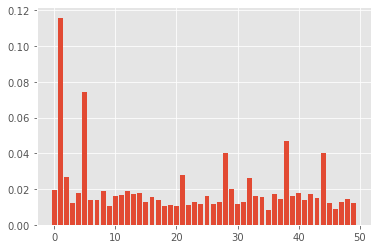

In [19]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

0


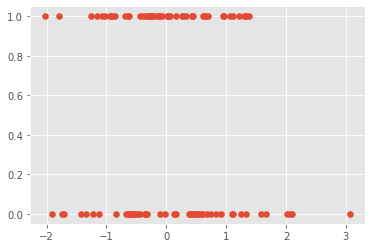

1


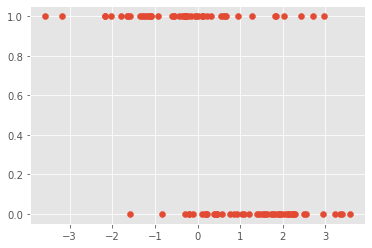

2


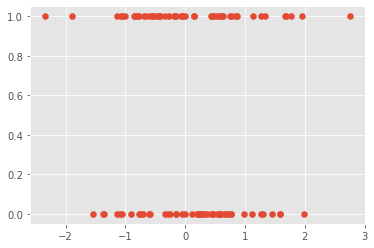

3


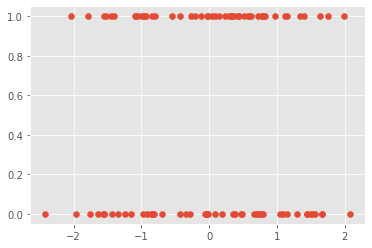

4


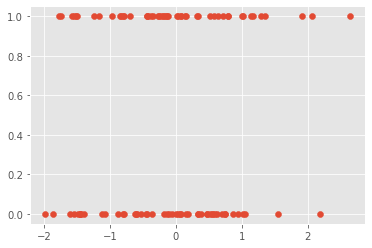

5


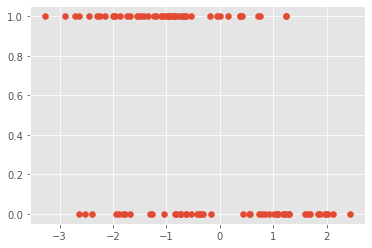

6


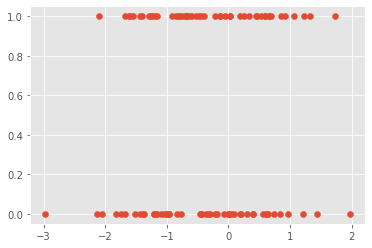

7


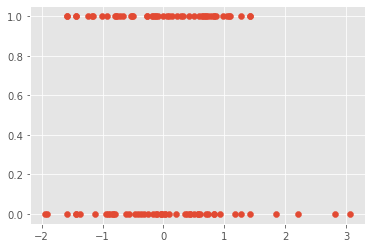

8


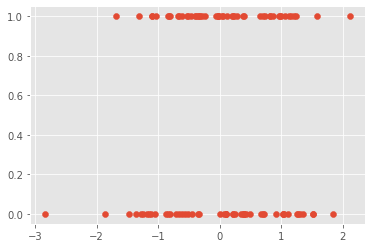

9


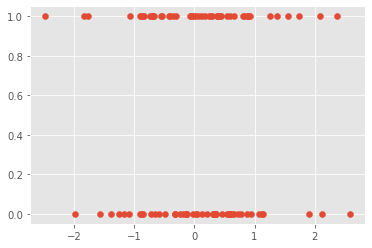

10


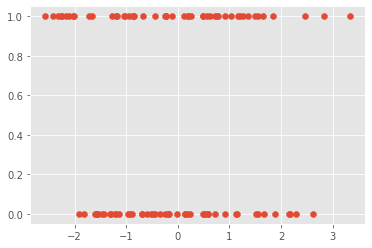

11


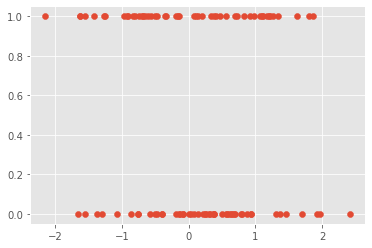

12


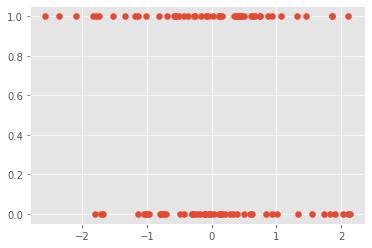

13


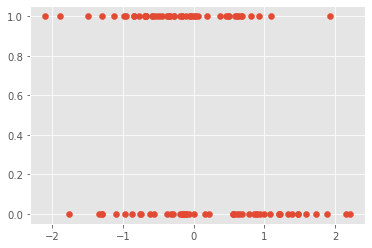

14


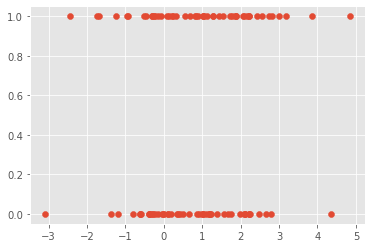

15


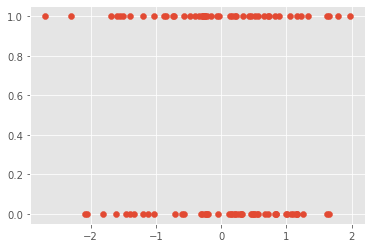

16


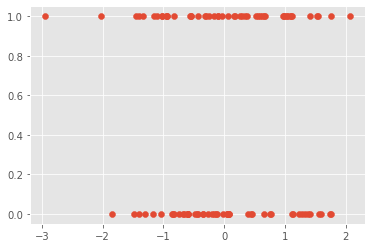

17


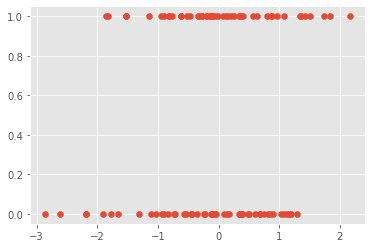

18


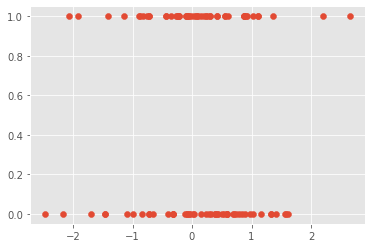

19


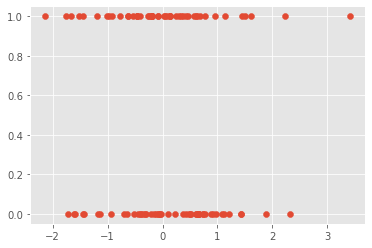

20


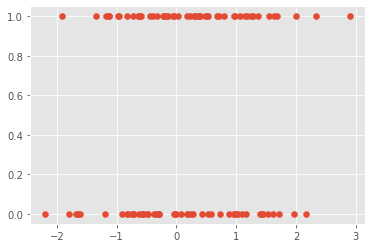

21


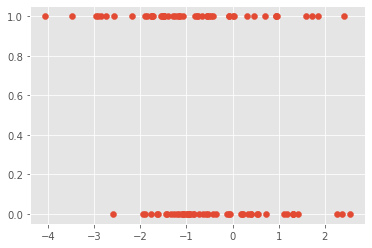

22


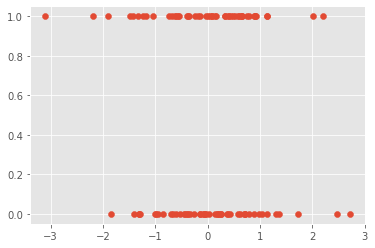

23


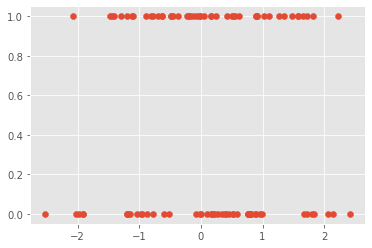

24


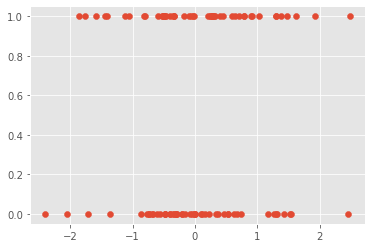

25


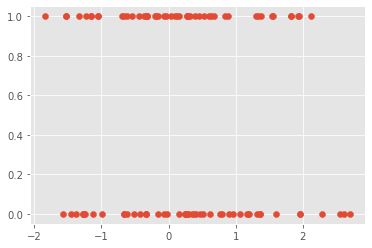

26


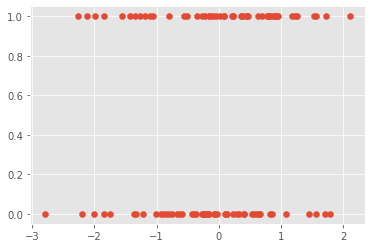

27


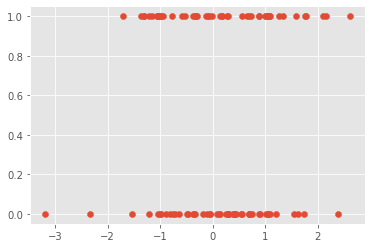

28


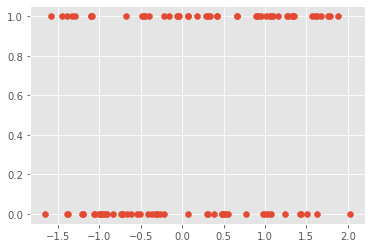

29


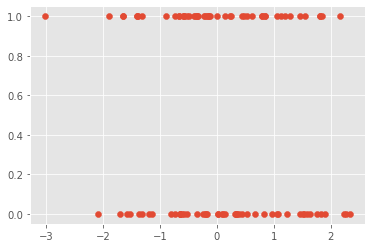

30


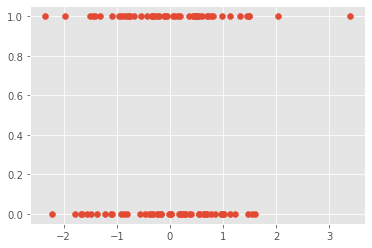

31


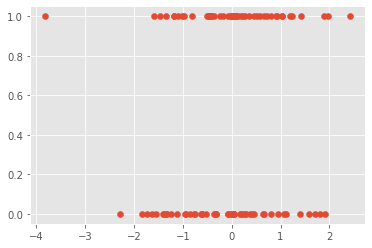

32


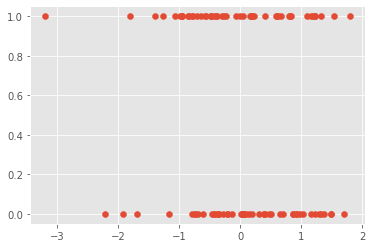

33


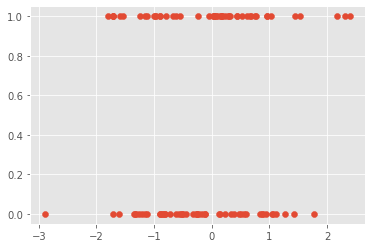

34


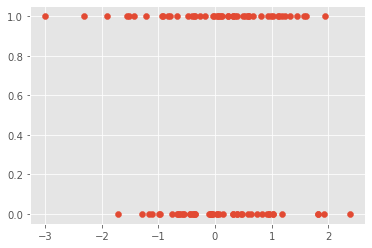

35


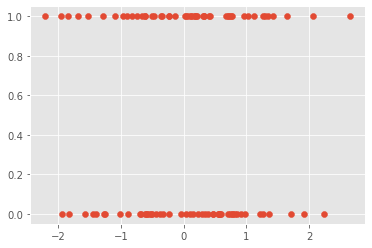

36


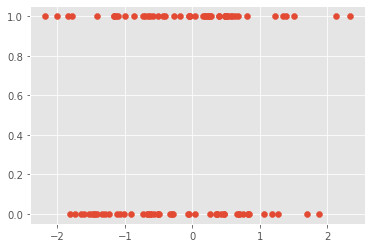

37


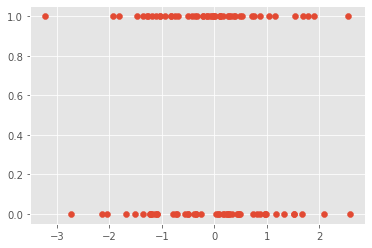

38


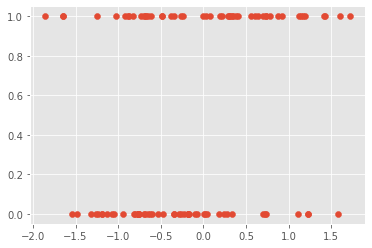

39


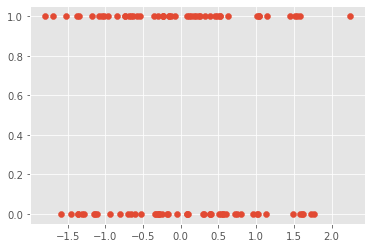

40


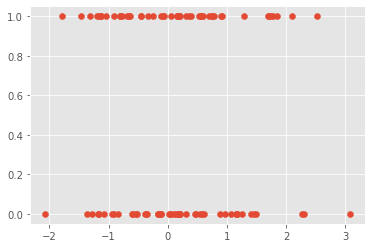

41


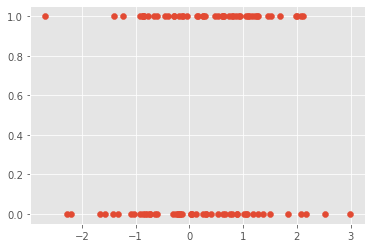

42


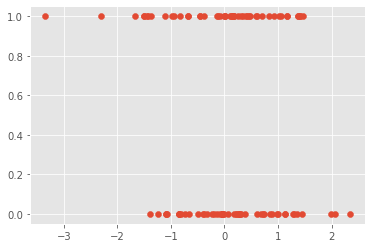

43


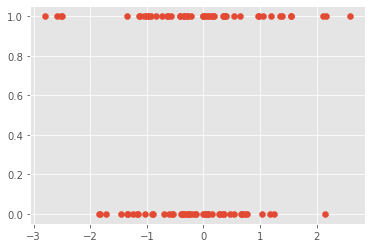

44


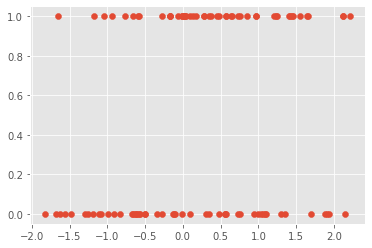

45


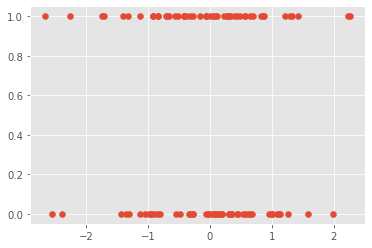

46


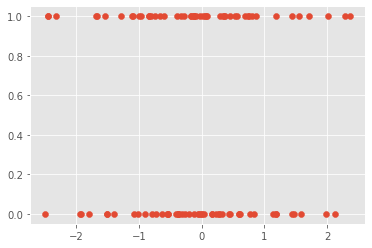

47


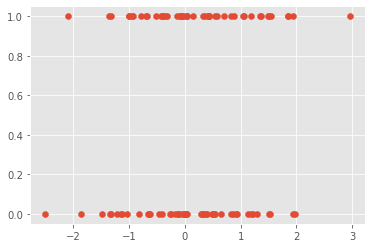

48


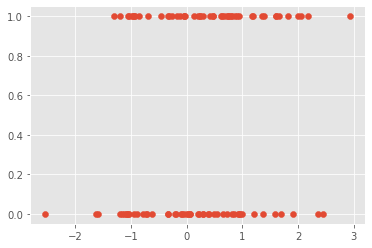

49


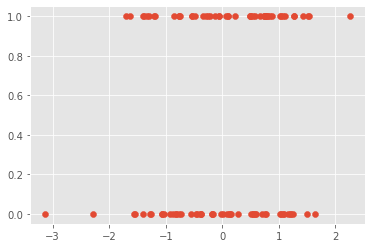

In [20]:
for col in X.columns:
    print(col)
    plt.scatter(X[col], y)
    plt.show()

[-0.03180432 -0.15209475  0.02538173  0.07291444  0.00214863 -0.17977724
  0.03481027 -0.00335367 -0.02413539 -0.1384924  -0.0402046  -0.07754095
 -0.01199642  0.00953607 -0.1044915   0.0823054   0.10244986  0.06883465
  0.02239842 -0.04877955  0.13359108 -0.18534539 -0.03555004 -0.02099947
 -0.03364891  0.01429385 -0.02919661  0.01898868  0.13778838 -0.084832
  0.10212646  0.02467756 -0.02445469  0.0171337  -0.00821947 -0.00922798
  0.08609191 -0.06935581  0.07269725  0.08029422 -0.02927529  0.04726632
  0.0069551  -0.02047325  0.02965159  0.11020851  0.04971382 -0.00675315
  0.03046868 -0.01995093]


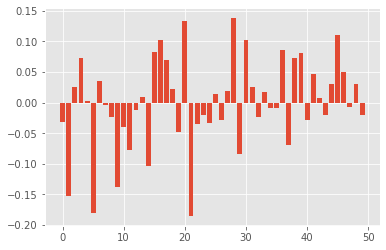

In [23]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.coef_)
plt.bar(X.columns, reg.coef_)
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [30]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()

In [34]:
X, y = make_regression(random_state=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [35]:
test_model(LinearRegression(), data)

test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: LinearRegression
Train score: 1.0
Test Score: 0.8328191257451382

Model: KNeighborsRegressor
Train score: 0.5300655721367826
Test Score: 0.07078594554559603

Model: RandomForestRegressor
Train score: 0.893078518106336
Test Score: 0.29928737916152137

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.4909840988747164

Model: AdaBoostRegressor
Train score: 0.9546799293469467
Test Score: 0.33531347294362746

Model: SVR
Train score: 0.006215310460808365
Test Score: -0.010118247516417211



In [36]:
X, y = make_swiss_roll(random_state=1, n_samples=500, noise=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

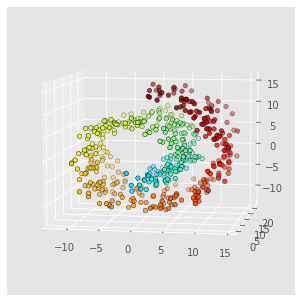

In [37]:
import mpl_toolkits.mplot3d.axes3d as p3
# #############################################################################
# Plot the result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(X[0], X[1], X[2],
           color=plt.cm.jet(y/y.max()),
           s=20, edgecolor='k')
plt.show()

In [ ]:
# Convert categorical data to numeric and separate target feature for training data

In [ ]:
# Convert categorical data to numeric and separate target feature for testing data

In [ ]:
# add missing dummy variables to testing set

In [ ]:
# Train the Logistic Regression model on the unscaled data and print the model score

In [ ]:
# Train a Random Forest Classifier model and print the model score

In [ ]:
# Scale the data

In [ ]:
# Train the Logistic Regression model on the scaled data and print the model score

In [ ]:
# Train a Random Forest Classifier model on the scaled data and print the model score